<a href="https://colab.research.google.com/github/ntmdrgl/CSCI-164/blob/main/AI24Ch3a_Nathaniel_Madrigal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import heapq
import matplotlib.pyplot as plt

# Tile Sliding Domain: Initial State Space

In [ ]:
StateDimension=3
InitialState = [1,2,3,4,5,6,0,7,8]
GoalState=[1,2,3,4,5,6,7,8,0]
Actions = lambda s: ['u', 'd', 'l', 'r']
Opposite=dict([('u','d'),('d','u'),('l','r'),('r','l'), (None, None)])

In [ ]:
def Result(state, action):
  i = state.index(0)
  newState = list(state)
  row,col=i//StateDimension, i % StateDimension
  if ( (action=='u' and row==0) or
       (action=='d' and row==StateDimension-1) or
       (action=='l' and col==0) or
       (action=='r' and col==StateDimension-1)):
      return newState
  if action=='u':
    l,r = row*StateDimension+col, (row-1)*StateDimension+col
  elif action=='d':
    l,r = row*StateDimension+col, (row+1)*StateDimension+col
  elif action=='l':
    l,r = row*StateDimension+col, row*StateDimension+col-1
  elif action=='r' :
    l,r = row*StateDimension+col, row*StateDimension+col+1
  newState[l], newState[r] = newState[r], newState[l]
  return newState

def PrintState(s):
  for i in range(0,len(s),StateDimension):
    print(s[i:i+StateDimension])

def LegalMove(state, action):
  i = state.index(0)
  row,col=i//StateDimension, i % StateDimension
  newState = state.copy()
  if ( (action=='u' and row==0) or
       (action=='d' and row==StateDimension-1) or
       (action=='l' and col==0) or
       (action=='r' and col==StateDimension-1)):
      return False
  return True


In [ ]:
def SingleTileManhattanDistance(tile, left, right):
  leftIndex = left.index(tile)
  rightIndex = right.index(tile)
  return (abs(leftIndex//StateDimension-rightIndex//StateDimension) +
          abs(leftIndex%StateDimension-rightIndex%StateDimension))

def ManhattanDistance(left, right):
  distances = [SingleTileManhattanDistance(tile, left, right)
     for tile in range(1, StateDimension**2)]
  ### print ("Distances= ", distances)
  return sum(distances)


In [ ]:
def OutOfPlace(left, right):
  distances = [left[i]!=right[i] and right[i] != 0
     for i in range(StateDimension**2)]
  return sum(distances)

In [ ]:
PrintState(InitialState)

[1, 2, 3]
[4, 5, 6]
[0, 7, 8]


In [ ]:
PrintState(GoalState)

[1, 2, 3]
[4, 5, 6]
[7, 8, 0]


In [ ]:
print("ManhattanDistance=  ", ManhattanDistance(InitialState, GoalState))
print("OutOfPlace= ", OutOfPlace(InitialState, GoalState))


ManhattanDistance=   2
OutOfPlace=  2


In [ ]:
PrintState(InitialState)
print()
state1 = Result(InitialState, 'u')
PrintState(state1)
print()
state1 = Result(state1, 'r')
PrintState(state1)

[1, 2, 3]
[4, 5, 6]
[0, 7, 8]

[1, 2, 3]
[0, 5, 6]
[4, 7, 8]

[1, 2, 3]
[5, 0, 6]
[4, 7, 8]


# Random Walk

Take some random moves from a state and return the new state and the sequence of moves.

Do not include moves undoing last move, or having no effect.

In [ ]:
def RandomWalk(state, steps):
  actionSequence = []
  actionLast = None
  for i in range(steps):
    action = None
    while action==None:
      action = random.choice(Actions(state))
      action = action if (LegalMove(state, action)
          and action!= Opposite[actionLast]) else None
    actionLast = action
    state = Result(state, action)
    actionSequence.append(action)
  return state, actionSequence



In [ ]:
state1, sol = RandomWalk(InitialState, 150)
PrintState(state1)
print (ManhattanDistance(state1, GoalState), sol)

state1, sol = RandomWalk(InitialState, 5)
PrintState(InitialState)
print (sol)
PrintState(state1)

[6, 2, 3]
[1, 4, 5]
[8, 7, 0]
8 ['r', 'u', 'l', 'u', 'r', 'd', 'l', 'u', 'r', 'd', 'l', 'u', 'r', 'd', 'r', 'u', 'l', 'l', 'd', 'r', 'u', 'r', 'd', 'd', 'l', 'l', 'u', 'r', 'r', 'u', 'l', 'd', 'r', 'd', 'l', 'l', 'u', 'r', 'd', 'r', 'u', 'l', 'd', 'l', 'u', 'r', 'r', 'd', 'l', 'l', 'u', 'u', 'r', 'd', 'l', 'u', 'r', 'r', 'd', 'l', 'l', 'u', 'r', 'd', 'd', 'r', 'u', 'u', 'l', 'd', 'r', 'u', 'l', 'd', 'd', 'l', 'u', 'u', 'r', 'r', 'd', 'd', 'l', 'l', 'u', 'u', 'r', 'd', 'l', 'd', 'r', 'r', 'u', 'l', 'u', 'r', 'd', 'd', 'l', 'l', 'u', 'r', 'd', 'l', 'u', 'u', 'r', 'r', 'd', 'l', 'l', 'u', 'r', 'd', 'l', 'd', 'r', 'r', 'u', 'u', 'l', 'l', 'd', 'r', 'r', 'u', 'l', 'd', 'r', 'd', 'l', 'l', 'u', 'u', 'r', 'd', 'r', 'u', 'l', 'd', 'd', 'l', 'u', 'u', 'r', 'd', 'l', 'd', 'r', 'r']
[1, 2, 3]
[4, 5, 6]
[0, 7, 8]
['r', 'u', 'r', 'd', 'l']
[1, 2, 3]
[4, 6, 8]
[7, 0, 5]


In [ ]:
def ApplyMoves(actions, state):
  for action in actions:
    state = Result(state, action)
  return state

In [ ]:
PrintState(InitialState)
print(['r','r'])
PrintState(ApplyMoves(['r','r'],InitialState))

[1, 2, 3]
[4, 5, 6]
[0, 7, 8]
['r', 'r']
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]


In [ ]:
def ReverseMoves(actions):
  ret = [Opposite[a] for a in actions]
  ret.reverse()
  return ret

In [ ]:
state1, sol = RandomWalk(GoalState, 5)
PrintState(state1)
print (sol)
print(ReverseMoves(sol))
PrintState (ApplyMoves(ReverseMoves(sol), state1))


[4, 1, 2]
[0, 5, 3]
[7, 8, 6]
['u', 'u', 'l', 'l', 'd']
['u', 'r', 'r', 'd', 'd']
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]


## Problem Class

INITIAL = InitialState  
IsGoal = Goal Test  
Actions = Actions List  
Result = Action Behavior  
ActionCost = Action Cost  

In [ ]:
class Problem(object): pass

## Node

In [ ]:
class Node(object):
  def __init__(self, state, parent=None, action=None, path_cost=0 ):
    self.State=state
    self.Parent=parent
    self.Action=action
    self.PathCost = path_cost

  def __str__(self):
    action = "<none>" if not self.Action else self.Action
    return str(self.State) + ", " + action
  def __repr__(self):
    action = "<none>" if not self.Action else self.Action
    return str(self.State) + ", " + action
  def __lt__(self, other):
    return self.PathCost < other.PathCost;

## Expand

In [ ]:
def Expand(problem, node):
  ret = []
  s = node.State
  for action in problem.Actions(s):
    sPrime = problem.Result(s, action)
    cost =node.PathCost + problem.ActionCost(s,action,sPrime)
    ret.append(Node(sPrime, node, action, cost))
  return ret


## Breadth-First Search

In [ ]:
def BreadthFirstSearch(problem):
  node = Node(tuple(problem.INITIAL))
  if problem.IsGoal(node.State):
    return node, 0
  Frontier = []
  Frontier.append(node)
  reached = set()
  reached.add(tuple(problem.INITIAL))
  nodesExpanded = 0
  while (Frontier):
    ### print([str(n) for n in Frontier])
    node = Frontier.pop(0)
    ### print(node)
    for child in Expand(problem, node):
      s = tuple(child.State)
      ### print (s, "IsGoal=", problem.IsGoal(s))
      if problem.IsGoal(s):
        return child, nodesExpanded
      if s not in reached:
        reached.add(s)
        Frontier.append(child)
    nodesExpanded += 1
    if nodesExpanded > 500000:
      break;
  return None, nodesExpanded

## Best-First Search

In [ ]:
def BestFirstSearch(problem, f):
  node = Node(tuple(problem.INITIAL))
  Frontier = []
  heapq.heappush(Frontier,(f(node), node))
  reached = {}
  reached[tuple(problem.INITIAL)]=node
  nodesExpanded = 0
  while (Frontier):
    ##print([(x, str(n)) for (x,n) in Frontier])
    fValue, node = heapq.heappop(Frontier)
    ##print (node.State, "IsGoal=", problem.IsGoal(tuple(node.State)))
    if problem.IsGoal(tuple(node.State)):
      return node, nodesExpanded    ### print(node)
    for child in Expand(problem, node):
      s = tuple(child.State)
      if s not in reached or child.PathCost < reached[s].PathCost:
        reached[s] = child
        heapq.heappush(Frontier, (f(child), child))
    nodesExpanded += 1
    if nodesExpanded > 500000:
      break;
  return None, nodesExpanded

## Problem 1

In [ ]:
TileSliding = Problem()
TileSliding.INITIAL = InitialState
TileSliding.IsGoal = lambda s: s==(1,2,3,4,5,6,7,8,0)
TileSliding.Actions = Actions
TileSliding.Result=Result
TileSliding.ActionCost = lambda s, a, sPrime: 1
print( TileSliding.IsGoal((1,2,3,4,5,6,7,8,0)) )
print( Node(InitialState) )
print(1+TileSliding.ActionCost(1,2,3))

True
[1, 2, 3, 4, 5, 6, 0, 7, 8], <none>
2


In [ ]:
TileSliding.INITIAL = [1,2,3,4,5,6,0,7,8]
ret, cost = BreadthFirstSearch(TileSliding)
print (ret, cost)

[1, 2, 3, 4, 5, 6, 7, 8, 0], r 2


In [ ]:
def Solution(node):
  if node.Parent==None:
    return []
  return Solution(node.Parent) + [node.Action]


In [ ]:
sol = Solution(ret)
print (sol)
print (TileSliding.INITIAL)
print (ApplyMoves(sol, TileSliding.INITIAL))

['r', 'r']
[1, 2, 3, 4, 5, 6, 0, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 0]


In [ ]:
TileSliding.INITIAL = [1,2,3,4,0,6,7,5,8]
ret, cost = BreadthFirstSearch(TileSliding)
print (ret, cost)

[1, 2, 3, 4, 5, 6, 7, 8, 0], r 2


In [ ]:
sol = Solution(ret)
print (sol)
print (TileSliding.INITIAL)
print (ApplyMoves(sol, TileSliding.INITIAL))

['d', 'r']
[1, 2, 3, 4, 0, 6, 7, 5, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 0]


In [ ]:
UniformCostF = lambda n: n.PathCost
AStarF = lambda n: n.PathCost+ManhattanDistance(n.State, GoalState)
TileSliding.INITIAL = [1,2,3,4,0,6,7,5,8]
ret, cost = BestFirstSearch(TileSliding, UniformCostF)
print (ret)
sol = Solution(ret)
print (sol)
print (TileSliding.INITIAL)
print (ApplyMoves(sol, TileSliding.INITIAL))
print ("Nodes Expanded=", cost)

[1, 2, 3, 4, 5, 6, 7, 8, 0], r
['d', 'r']
[1, 2, 3, 4, 0, 6, 7, 5, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 0]
Nodes Expanded= 8


# Problem 2

In [ ]:
state1, sol = RandomWalk(GoalState, 300)
PrintState(state1)
print (sol)
print(ReverseMoves(sol))
PrintState (ApplyMoves(ReverseMoves(sol), state1))

[5, 4, 7]
[3, 2, 8]
[1, 6, 0]
['l', 'l', 'u', 'u', 'r', 'd', 'l', 'd', 'r', 'r', 'u', 'u', 'l', 'l', 'd', 'd', 'r', 'u', 'l', 'u', 'r', 'r', 'd', 'd', 'l', 'u', 'u', 'r', 'd', 'd', 'l', 'u', 'r', 'u', 'l', 'd', 'l', 'u', 'r', 'd', 'r', 'd', 'l', 'l', 'u', 'r', 'r', 'u', 'l', 'd', 'r', 'd', 'l', 'u', 'r', 'u', 'l', 'd', 'r', 'u', 'l', 'l', 'd', 'r', 'u', 'l', 'd', 'r', 'u', 'r', 'd', 'd', 'l', 'u', 'r', 'u', 'l', 'l', 'd', 'd', 'r', 'u', 'l', 'u', 'r', 'r', 'd', 'd', 'l', 'l', 'u', 'u', 'r', 'd', 'l', 'd', 'r', 'r', 'u', 'u', 'l', 'l', 'd', 'r', 'u', 'l', 'd', 'r', 'd', 'l', 'u', 'r', 'u', 'r', 'd', 'd', 'l', 'u', 'l', 'd', 'r', 'r', 'u', 'l', 'l', 'u', 'r', 'r', 'd', 'd', 'l', 'u', 'l', 'd', 'r', 'r', 'u', 'u', 'l', 'l', 'd', 'd', 'r', 'r', 'u', 'l', 'd', 'l', 'u', 'r', 'u', 'r', 'd', 'd', 'l', 'u', 'r', 'd', 'l', 'l', 'u', 'u', 'r', 'd', 'd', 'r', 'u', 'l', 'u', 'l', 'd', 'd', 'r', 'u', 'r', 'd', 'l', 'u', 'l', 'd', 'r', 'r', 'u', 'u', 'l', 'd', 'r', 'u', 'l', 'l', 'd', 'd', 'r', 'u',

In [ ]:
TileSliding.INITIAL = state1
ret, cost = BreadthFirstSearch(TileSliding)
print (ret)
sol = Solution(ret)
print (sol)
print (TileSliding.INITIAL)
print (ApplyMoves(sol, TileSliding.INITIAL))
print ("Length of solution: ", len(sol))
print ("Nodes Expanded=", cost)

[1, 2, 3, 4, 5, 6, 7, 8, 0], d
['u', 'u', 'l', 'l', 'd', 'r', 'r', 'd', 'l', 'u', 'r', 'u', 'l', 'l', 'd', 'd', 'r', 'u', 'r', 'u', 'l', 'l', 'd', 'r', 'r', 'd']
[5, 4, 7, 3, 2, 8, 1, 6, 0]
[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  26
Nodes Expanded= 145151


In [ ]:
UniformCostF = lambda n: n.PathCost
TileSliding.INITIAL = state1
ret, cost = BestFirstSearch(TileSliding, UniformCostF)
print (ret)
sol = Solution(ret)
print (sol)
print (TileSliding.INITIAL)
print (ApplyMoves(sol, TileSliding.INITIAL))
print ("Length of solution: ", len(sol))
print ("Nodes Expanded=", cost)

[1, 2, 3, 4, 5, 6, 7, 8, 0], d
['u', 'u', 'l', 'l', 'd', 'r', 'r', 'd', 'l', 'u', 'r', 'u', 'l', 'l', 'd', 'd', 'r', 'u', 'r', 'u', 'l', 'l', 'd', 'r', 'r', 'd']
[5, 4, 7, 3, 2, 8, 1, 6, 0]
[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  26
Nodes Expanded= 160964


# Problem List

In [ ]:
findNum = 10
randomWalkDistance = 300
problemList = []
for i in range(10):
  state1, sol = RandomWalk(GoalState, 300)
  problemList.append(state1)
print (problemList)

[[5, 8, 2, 4, 3, 1, 6, 7, 0], [6, 5, 2, 1, 3, 4, 0, 7, 8], [3, 2, 6, 1, 0, 5, 4, 8, 7], [8, 7, 6, 3, 0, 5, 4, 2, 1], [0, 1, 7, 8, 2, 6, 5, 4, 3], [7, 5, 4, 6, 1, 8, 0, 2, 3], [2, 7, 6, 1, 0, 5, 4, 8, 3], [0, 4, 1, 8, 2, 7, 3, 6, 5], [4, 6, 3, 7, 5, 1, 0, 2, 8], [6, 1, 3, 5, 0, 8, 4, 2, 7]]


### Breadth First Search w/ Test Problems

In [ ]:
testProblems = [[5, 3, 0, 4, 7, 6, 2, 1, 8], [3, 2, 0, 1, 5, 4, 7, 8, 6], [0, 1, 3, 8, 5, 2, 6, 7, 4],
                [3, 7, 6, 2, 4, 1, 8, 5, 0], [6, 7, 5, 8, 0, 1, 2, 3, 4], [7, 4, 6, 8, 0, 1, 3, 2, 5],
                [0, 1, 8, 3, 5, 2, 6, 4, 7], [0, 4, 6, 5, 8, 1, 7, 2, 3], [1, 5, 7, 6, 0, 3, 4, 2, 8],
                [0, 2, 4, 1, 7, 6, 3, 5, 8]]

Solutions = []
for s in testProblems:
  TileSliding.INITIAL = s
  ret, cost = BreadthFirstSearch(TileSliding)
  sol = Solution(ret)
  print (sol)
  print ("-----------------------")
  print (TileSliding.INITIAL,'\n')
  print (ApplyMoves(sol, TileSliding.INITIAL))
  print ("Length of solution: ", len(sol))
  print ("Nodes Expanded=", cost)
  print ("-----------------------")
  Solutions.append((''.join(map(str, s)), ''.join(sol), cost))
print ("-------")
print (Solutions)


['l', 'd', 'l', 'd', 'r', 'u', 'u', 'l', 'd', 'd', 'r', 'u', 'u', 'l', 'd', 'd', 'r', 'r']
-----------------------
[5, 3, 0, 4, 7, 6, 2, 1, 8] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  18
Nodes Expanded= 15775
-----------------------
['l', 'd', 'r', 'u', 'l', 'l', 'd', 'r', 'r', 'u', 'l', 'd', 'r', 'd']
-----------------------
[3, 2, 0, 1, 5, 4, 7, 8, 6] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  14
Nodes Expanded= 2645
-----------------------
['d', 'd', 'r', 'u', 'r', 'd', 'l', 'l', 'u', 'u', 'r', 'd', 'd', 'l', 'u', 'r', 'r', 'd', 'l', 'l', 'u', 'r', 'r', 'd']
-----------------------
[0, 1, 3, 8, 5, 2, 6, 7, 4] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  24
Nodes Expanded= 99562
-----------------------
['u', 'l', 'u', 'l', 'd', 'r', 'r', 'u', 'l', 'd', 'd', 'r', 'u', 'l', 'd', 'l', 'u', 'r', 'u', 'l', 'd', 'r', 'r', 'd']
-----------------------
[3, 7, 6, 2, 4, 1, 8, 5, 0] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  24
Nodes Expanded= 102839
------------

### Uniform Cost Search w/ Test Problems

In [ ]:
UniformCostF = lambda n: n.PathCost
testProblems = [[5, 3, 0, 4, 7, 6, 2, 1, 8], [3, 2, 0, 1, 5, 4, 7, 8, 6], [0, 1, 3, 8, 5, 2, 6, 7, 4],
                [3, 7, 6, 2, 4, 1, 8, 5, 0], [6, 7, 5, 8, 0, 1, 2, 3, 4], [7, 4, 6, 8, 0, 1, 3, 2, 5],
                [0, 1, 8, 3, 5, 2, 6, 4, 7], [0, 4, 6, 5, 8, 1, 7, 2, 3], [1, 5, 7, 6, 0, 3, 4, 2, 8],
                [0, 2, 4, 1, 7, 6, 3, 5, 8]]

Solutions = []
for s in testProblems:
  TileSliding.INITIAL = s
  ret, cost = BestFirstSearch(TileSliding, UniformCostF)
  sol = Solution(ret)
  print (sol)
  print ("-----------------------")
  print (TileSliding.INITIAL,'\n')
  print (ApplyMoves(sol, TileSliding.INITIAL))
  print ("Length of solution: ", len(sol))
  print ("Nodes Expanded=", cost)
  print ("-----------------------")
  Solutions.append((''.join(map(str, s)), ''.join(sol), cost))
print ("-------")
print (Solutions)

['l', 'l', 'd', 'd', 'r', 'u', 'u', 'l', 'd', 'd', 'r', 'u', 'u', 'l', 'd', 'r', 'd', 'r']
-----------------------
[5, 3, 0, 4, 7, 6, 2, 1, 8] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  18
Nodes Expanded= 22919
-----------------------
['l', 'd', 'r', 'u', 'l', 'l', 'd', 'r', 'r', 'u', 'l', 'd', 'r', 'd']
-----------------------
[3, 2, 0, 1, 5, 4, 7, 8, 6] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  14
Nodes Expanded= 4754
-----------------------
['r', 'd', 'd', 'l', 'u', 'r', 'r', 'd', 'l', 'l', 'u', 'u', 'r', 'd', 'r', 'u', 'l', 'l', 'd', 'r', 'u', 'r', 'd', 'd']
-----------------------
[0, 1, 3, 8, 5, 2, 6, 7, 4] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  24
Nodes Expanded= 120796
-----------------------
['u', 'l', 'u', 'l', 'd', 'r', 'r', 'u', 'l', 'd', 'd', 'r', 'u', 'l', 'd', 'l', 'u', 'r', 'u', 'l', 'd', 'r', 'r', 'd']
-----------------------
[3, 7, 6, 2, 4, 1, 8, 5, 0] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  24
Nodes Expanded= 121538
-----------

### AStar using ManhattanDistance w/ Test Problems

In [ ]:
AStarFb = lambda n: n.PathCost + Manhattan(n.State, GoalState)
testProblems = [[5, 3, 0, 4, 7, 6, 2, 1, 8], [3, 2, 0, 1, 5, 4, 7, 8, 6], [0, 1, 3, 8, 5, 2, 6, 7, 4],
                [3, 7, 6, 2, 4, 1, 8, 5, 0], [6, 7, 5, 8, 0, 1, 2, 3, 4], [7, 4, 6, 8, 0, 1, 3, 2, 5],
                [0, 1, 8, 3, 5, 2, 6, 4, 7], [0, 4, 6, 5, 8, 1, 7, 2, 3], [1, 5, 7, 6, 0, 3, 4, 2, 8],
                [0, 2, 4, 1, 7, 6, 3, 5, 8]]

Solutions = []
for s in testProblems:
  TileSliding.INITIAL = s
  ret, cost = BestFirstSearch(TileSliding, AStarF)
  sol = Solution(ret)
  print (sol)
  print ("-----------------------")
  print (TileSliding.INITIAL,'\n')
  print (ApplyMoves(sol, TileSliding.INITIAL))
  print ("Length of solution: ", len(sol))
  print ("Nodes Expanded=", cost)
  print ("-----------------------")
  Solutions.append((''.join(map(str, s)), ''.join(sol), cost))
print ("-------")
print (Solutions)

['l', 'l', 'd', 'd', 'r', 'u', 'u', 'l', 'd', 'd', 'r', 'u', 'u', 'l', 'd', 'r', 'd', 'r']
-----------------------
[5, 3, 0, 4, 7, 6, 2, 1, 8] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  18
Nodes Expanded= 251
-----------------------
['l', 'd', 'r', 'u', 'l', 'l', 'd', 'r', 'r', 'u', 'l', 'd', 'r', 'd']
-----------------------
[3, 2, 0, 1, 5, 4, 7, 8, 6] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  14
Nodes Expanded= 92
-----------------------
['d', 'd', 'r', 'u', 'r', 'd', 'l', 'l', 'u', 'u', 'r', 'd', 'd', 'l', 'u', 'r', 'r', 'd', 'l', 'l', 'u', 'r', 'r', 'd']
-----------------------
[0, 1, 3, 8, 5, 2, 6, 7, 4] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  24
Nodes Expanded= 2798
-----------------------
['u', 'l', 'u', 'l', 'd', 'r', 'r', 'u', 'l', 'd', 'd', 'r', 'u', 'l', 'd', 'l', 'u', 'r', 'u', 'l', 'd', 'r', 'r', 'd']
-----------------------
[3, 7, 6, 2, 4, 1, 8, 5, 0] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  24
Nodes Expanded= 1769
-------------------

### AStar using OutOfPlace w/ Test Problems

In [ ]:
AStarFb = lambda n: n.PathCost + OutOfPlace(n.State, GoalState)
testProblems = [[5, 3, 0, 4, 7, 6, 2, 1, 8], [3, 2, 0, 1, 5, 4, 7, 8, 6], [0, 1, 3, 8, 5, 2, 6, 7, 4],
                [3, 7, 6, 2, 4, 1, 8, 5, 0], [6, 7, 5, 8, 0, 1, 2, 3, 4], [7, 4, 6, 8, 0, 1, 3, 2, 5],
                [0, 1, 8, 3, 5, 2, 6, 4, 7], [0, 4, 6, 5, 8, 1, 7, 2, 3], [1, 5, 7, 6, 0, 3, 4, 2, 8],
                [0, 2, 4, 1, 7, 6, 3, 5, 8]]

Solutions = []
for s in testProblems:
  TileSliding.INITIAL = s
  ret, cost = BestFirstSearch(TileSliding, AStarFb)
  sol = Solution(ret)
  print (sol)
  print ("-----------------------")
  print (TileSliding.INITIAL,'\n')
  print (ApplyMoves(sol, TileSliding.INITIAL))
  print ("Length of solution: ", len(sol))
  print ("Nodes Expanded=", cost)
  print ("-----------------------")
  Solutions.append((''.join(map(str, s)), ''.join(sol), cost))
print ("-------")
print (Solutions)

['l', 'd', 'l', 'd', 'r', 'u', 'u', 'l', 'd', 'd', 'r', 'u', 'u', 'l', 'd', 'd', 'r', 'r']
-----------------------
[5, 3, 0, 4, 7, 6, 2, 1, 8] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  18
Nodes Expanded= 1319
-----------------------
['l', 'd', 'r', 'u', 'l', 'l', 'd', 'r', 'r', 'u', 'l', 'd', 'r', 'd']
-----------------------
[3, 2, 0, 1, 5, 4, 7, 8, 6] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  14
Nodes Expanded= 242
-----------------------
['d', 'd', 'r', 'u', 'r', 'd', 'l', 'l', 'u', 'u', 'r', 'd', 'd', 'l', 'u', 'r', 'r', 'd', 'l', 'l', 'u', 'r', 'r', 'd']
-----------------------
[0, 1, 3, 8, 5, 2, 6, 7, 4] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  24
Nodes Expanded= 18751
-----------------------
['u', 'l', 'u', 'l', 'd', 'r', 'r', 'u', 'l', 'd', 'd', 'r', 'u', 'l', 'd', 'l', 'u', 'r', 'u', 'l', 'd', 'r', 'r', 'd']
-----------------------
[3, 7, 6, 2, 4, 1, 8, 5, 0] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  24
Nodes Expanded= 17913
---------------

### Best First Search -- Greedy

In [ ]:
### Best First
bestFirstSearchf = lambda n: OutOfPlace(n.State, GoalState)
testProblems = [[5, 3, 0, 4, 7, 6, 2, 1, 8], [3, 2, 0, 1, 5, 4, 7, 8, 6], [0, 1, 3, 8, 5, 2, 6, 7, 4],
                [3, 7, 6, 2, 4, 1, 8, 5, 0], [6, 7, 5, 8, 0, 1, 2, 3, 4], [7, 4, 6, 8, 0, 1, 3, 2, 5],
                [0, 1, 8, 3, 5, 2, 6, 4, 7], [0, 4, 6, 5, 8, 1, 7, 2, 3], [1, 5, 7, 6, 0, 3, 4, 2, 8],
                [0, 2, 4, 1, 7, 6, 3, 5, 8]]

Solutions = []
for s in testProblems:
  TileSliding.INITIAL = s
  ret, cost = BestFirstSearch(TileSliding, bestFirstSearchf)
  sol = Solution(ret)
  print (sol)
  print ("-----------------------")
  print (TileSliding.INITIAL,'\n')
  print (ApplyMoves(sol, TileSliding.INITIAL))
  print ("Length of solution: ", len(sol))
  print ("Nodes Expanded=", cost)
  print ("-----------------------")
  Solutions.append((''.join(map(str, s)), ''.join(sol), cost))
print ("-------")
print (Solutions)

['l', 'l', 'd', 'd', 'r', 'u', 'u', 'l', 'd', 'd', 'r', 'u', 'u', 'l', 'd', 'r', 'd', 'r']
-----------------------
[5, 3, 0, 4, 7, 6, 2, 1, 8] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  18
Nodes Expanded= 52
-----------------------
['l', 'l', 'd', 'r', 'u', 'r', 'd', 'l', 'l', 'u', 'r', 'r', 'd', 'l', 'u', 'l', 'd', 'r', 'r', 'd']
-----------------------
[3, 2, 0, 1, 5, 4, 7, 8, 6] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  20
Nodes Expanded= 196
-----------------------
['r', 'd', 'd', 'l', 'u', 'r', 'r', 'd', 'l', 'l', 'u', 'r', 'r', 'd', 'l', 'l', 'u', 'r', 'u', 'l', 'd', 'd', 'r', 'u', 'l', 'u', 'r', 'd', 'd', 'r']
-----------------------
[0, 1, 3, 8, 5, 2, 6, 7, 4] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  30
Nodes Expanded= 380
-----------------------
['u', 'u', 'l', 'l', 'd', 'r', 'd', 'r', 'u', 'u', 'l', 'd', 'd', 'l', 'u', 'r', 'u', 'l', 'd', 'r', 'r', 'd', 'l', 'u', 'l', 'd', 'r', 'r']
-----------------------
[3, 7, 6, 2, 4, 1, 8, 5, 0] 

[1, 2, 3, 4, 

In [ ]:
### Best First
bestFirstSearchf = lambda n: ManhattanDistance(n.State, GoalState)
testProblems = [[5, 3, 0, 4, 7, 6, 2, 1, 8], [3, 2, 0, 1, 5, 4, 7, 8, 6], [0, 1, 3, 8, 5, 2, 6, 7, 4],
                [3, 7, 6, 2, 4, 1, 8, 5, 0], [6, 7, 5, 8, 0, 1, 2, 3, 4], [7, 4, 6, 8, 0, 1, 3, 2, 5],
                [0, 1, 8, 3, 5, 2, 6, 4, 7], [0, 4, 6, 5, 8, 1, 7, 2, 3], [1, 5, 7, 6, 0, 3, 4, 2, 8],
                [0, 2, 4, 1, 7, 6, 3, 5, 8]]

Solutions = []
for s in testProblems:
  TileSliding.INITIAL = s
  ret, cost = BestFirstSearch(TileSliding, bestFirstSearchf)
  sol = Solution(ret)
  print (sol)
  print ("-----------------------")
  print (TileSliding.INITIAL,'\n')
  print (ApplyMoves(sol, TileSliding.INITIAL))
  print ("Length of solution: ", len(sol))
  print ("Nodes Expanded=", cost)
  print ("-----------------------")
  Solutions.append((''.join(map(str, s)), ''.join(sol), cost))
print ("-------")
print (Solutions)

['l', 'l', 'd', 'd', 'r', 'u', 'l', 'd', 'r', 'u', 'l', 'u', 'r', 'd', 'd', 'l', 'u', 'u', 'r', 'd', 'l', 'd', 'r', 'r']
-----------------------
[5, 3, 0, 4, 7, 6, 2, 1, 8] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  24
Nodes Expanded= 263
-----------------------
['l', 'l', 'd', 'r', 'u', 'r', 'd', 'l', 'l', 'u', 'r', 'r', 'd', 'l', 'u', 'l', 'd', 'r', 'r', 'd']
-----------------------
[3, 2, 0, 1, 5, 4, 7, 8, 6] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  20
Nodes Expanded= 193
-----------------------
['r', 'd', 'l', 'd', 'r', 'u', 'u', 'r', 'd', 'd', 'l', 'u', 'r', 'u', 'l', 'd', 'l', 'u', 'r', 'r', 'd', 'l', 'd', 'r', 'u', 'u', 'l', 'l', 'd', 'r', 'r', 'u', 'l', 'd', 'l', 'u', 'r', 'r', 'd', 'l', 'u', 'l', 'd', 'r', 'r', 'd']
-----------------------
[0, 1, 3, 8, 5, 2, 6, 7, 4] 

[1, 2, 3, 4, 5, 6, 7, 8, 0]
Length of solution:  46
Nodes Expanded= 412
-----------------------
['u', 'u', 'l', 'l', 'd', 'r', 'd', 'r', 'u', 'u', 'l', 'd', 'd', 'l', 'u', 'r', 'u', 'l', 'd', '

# Domain 2

In [ ]:
VectorWorldDim = 10
VectorWorld = Problem()
VectorWorld.INITIAL = [0]
VectorWorld.IsGoal = lambda s: s==[3,] or s==(3,)
VectorWorld.Actions = lambda s: ['Left', 'Right']
## TileSliding.Result=VectorWorldResult
VectorWorld.ActionCost = lambda s, a, sPrime: 1

In [ ]:
def VectorWorldResult(state, action):
  if action=='Left':
    return [(state[0]+VectorWorldDim-1)%VectorWorldDim]
  else:
    return [(state[0]+1)%VectorWorldDim]
VectorWorld.Result=VectorWorldResult


In [ ]:
print (VectorWorld.IsGoal((3,)))

True


In [ ]:
ret, cost = BreadthFirstSearch(VectorWorld)
print ("ret=", ret)
sol = Solution(ret)
print (sol)


ret= [3], Right
['Right', 'Right', 'Right']


In [ ]:
VectorWorld.INITIAL = [8]

In [ ]:
ret, cost = BreadthFirstSearch(VectorWorld)
print ("ret=", ret)
sol = Solution(ret)
print (sol)

ret= [3], Left
['Left', 'Left', 'Left', 'Left', 'Left']


3X3 Random Walk Generation

In [ ]:
StateDimension = 3
InitialState = [1,2,3,4,5,6,7,8,0]

problems = []

for i in range(3):
  state1, sol = RandomWalk(InitialState, 5)
  problems.append(state1)

for i in range(3):
  state1, sol = RandomWalk(InitialState, 10)
  problems.append(state1)

for i in range(3):
  state1, sol = RandomWalk(InitialState, 20)
  problems.append(state1)

for i in range(3):
  state1, sol = RandomWalk(InitialState, 40)
  problems.append(state1)

for i in range(3):
  state1, sol = RandomWalk(InitialState, 80)
  problems.append(state1)

print(problems)

[[1, 3, 5, 4, 2, 0, 7, 8, 6], [1, 2, 3, 4, 8, 0, 7, 6, 5], [1, 3, 5, 4, 2, 0, 7, 8, 6], [0, 1, 2, 4, 7, 3, 8, 5, 6], [1, 8, 5, 4, 0, 2, 7, 6, 3], [4, 1, 2, 8, 7, 3, 0, 5, 6], [3, 8, 5, 7, 1, 2, 0, 6, 4], [1, 7, 5, 4, 0, 8, 6, 3, 2], [0, 1, 2, 3, 6, 5, 4, 8, 7], [6, 2, 4, 1, 5, 8, 7, 3, 0], [7, 6, 0, 3, 4, 5, 2, 1, 8], [2, 6, 5, 1, 8, 3, 7, 4, 0], [1, 8, 2, 7, 3, 5, 0, 6, 4], [4, 8, 0, 5, 7, 3, 1, 2, 6], [8, 5, 0, 4, 7, 1, 2, 3, 6]]


3X3: Breadth First Search

In [ ]:
Solutions = []
counter = 1
nodes_expanded = []
for s in problems:
  TileSliding.INITIAL = s
  ret, cost = BreadthFirstSearch(TileSliding)
  sol = Solution(ret)
  print ("-----------------------")
  print ("Problem: ", counter)
  print ("Init state: ", TileSliding.INITIAL)
  print ("Sol: ", sol)
  print (ApplyMoves(sol, TileSliding.INITIAL))
  print ("Len Sol: ", len(sol))
  print ("# Nodes Expanded=", cost)
  nodes_expanded.append(cost);
  print ("-----------------------")
  Solutions.append((''.join(map(str, s)), ''.join(sol), cost))
  counter += 1
print ("-------")
print (Solutions)

-----------------------
Problem:  1
Init state:  [1, 3, 5, 4, 2, 0, 7, 8, 6]
Sol:  ['u', 'l', 'd', 'r', 'd']
[1, 2, 3, 4, 5, 6, 7, 8, 0]
Len Sol:  5
# Nodes Expanded= 21
-----------------------
-----------------------
Problem:  2
Init state:  [1, 2, 3, 4, 8, 0, 7, 6, 5]
Sol:  ['d', 'l', 'u', 'r', 'd']
[1, 2, 3, 4, 5, 6, 7, 8, 0]
Len Sol:  5
# Nodes Expanded= 25
-----------------------
-----------------------
Problem:  3
Init state:  [1, 3, 5, 4, 2, 0, 7, 8, 6]
Sol:  ['u', 'l', 'd', 'r', 'd']
[1, 2, 3, 4, 5, 6, 7, 8, 0]
Len Sol:  5
# Nodes Expanded= 21
-----------------------
-----------------------
Problem:  4
Init state:  [0, 1, 2, 4, 7, 3, 8, 5, 6]
Sol:  ['d', 'r', 'd', 'l', 'u', 'u', 'r', 'r', 'd', 'd']
[1, 2, 3, 4, 5, 6, 7, 8, 0]
Len Sol:  10
# Nodes Expanded= 317
-----------------------
-----------------------
Problem:  5
Init state:  [1, 8, 5, 4, 0, 2, 7, 6, 3]
Sol:  ['u', 'r', 'd', 'd', 'l', 'u', 'u', 'r', 'd', 'd']
[1, 2, 3, 4, 5, 6, 7, 8, 0]
Len Sol:  10
# Nodes Expanded= 365


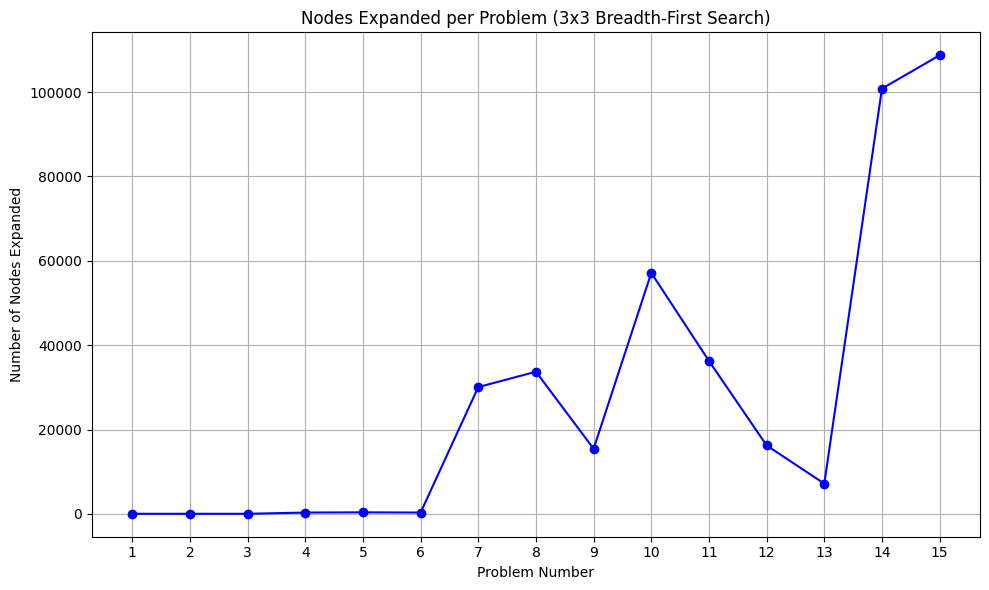

In [ ]:
problem_numbers = list(range(1, len(nodes_expanded) + 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(problem_numbers, nodes_expanded, marker='o', linestyle='-', color='blue')
plt.title('Nodes Expanded per Problem (3x3 Breadth-First Search)')
plt.xlabel('Problem Number')
plt.ylabel('Number of Nodes Expanded')
plt.xticks(problem_numbers)  # Show each problem number on the x-axis
plt.grid(True)
plt.tight_layout()
plt.show()

3X3: A*

In [ ]:
AStarFb = lambda n: n.PathCost + OutOfPlace(n.State, GoalState) + ManhattanDistance(n.State, GoalState)

Solutions = []
counter = 1
nodes_expanded = []
for s in problems:
  TileSliding.INITIAL = s
  ret, cost = BestFirstSearch(TileSliding, AStarFb)
  sol = Solution(ret)
  print ("-----------------------")
  print ("Problem: ", counter)
  print ("Init state: ", TileSliding.INITIAL)
  print ("Sol: ", sol)
  print (TileSliding.INITIAL,'\n')
  print (ApplyMoves(sol, TileSliding.INITIAL))
  print ("Len Sol: ", len(sol))
  print ("# Nodes Expanded=", cost)
  nodes_expanded.append(cost)
  print ("-----------------------")
  Solutions.append((''.join(map(str, s)), ''.join(sol), cost))
  counter += 1
print ("-------")
print (Solutions)

-----------------------
Problem:  1
Init state:  [1, 2, 3, 4, 0, 6, 7, 8, 5, 10, 11, 12, 9, 13, 14, 15]
Sol:  ['d', 'd', 'r', 'r', 'r']
[1, 2, 3, 4, 0, 6, 7, 8, 5, 10, 11, 12, 9, 13, 14, 15] 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0]
Len Sol:  5
# Nodes Expanded= 5
-----------------------
-----------------------
Problem:  2
Init state:  [1, 2, 3, 4, 0, 5, 6, 8, 9, 10, 7, 11, 13, 14, 15, 12]
Sol:  ['r', 'r', 'd', 'r', 'd']
[1, 2, 3, 4, 0, 5, 6, 8, 9, 10, 7, 11, 13, 14, 15, 12] 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0]
Len Sol:  5
# Nodes Expanded= 5
-----------------------
-----------------------
Problem:  3
Init state:  [1, 2, 4, 0, 5, 6, 3, 8, 9, 10, 7, 11, 13, 14, 15, 12]
Sol:  ['l', 'd', 'd', 'r', 'd']
[1, 2, 4, 0, 5, 6, 3, 8, 9, 10, 7, 11, 13, 14, 15, 12] 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0]
Len Sol:  5
# Nodes Expanded= 5
-----------------------
-----------------------
Problem:  4
Init state:  [1, 2, 4, 8, 5, 6, 3, 11, 9, 10, 7, 12,

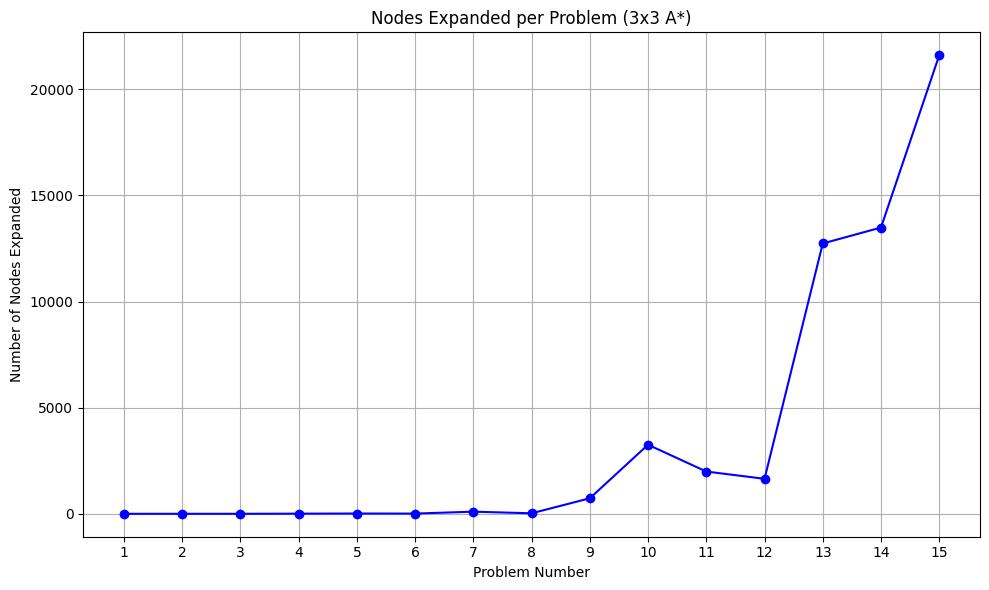

In [ ]:
problem_numbers = list(range(1, len(nodes_expanded) + 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(problem_numbers, nodes_expanded, marker='o', linestyle='-', color='blue')
plt.title('Nodes Expanded per Problem (3x3 A*)')
plt.xlabel('Problem Number')
plt.ylabel('Number of Nodes Expanded')
plt.xticks(problem_numbers)  # Show each problem number on the x-axis
plt.grid(True)
plt.tight_layout()
plt.show()

4X4 Random Walk Generation

In [ ]:
StateDimension = 4
InitialState = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0]
GoalState = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0]
Actions = lambda s: ['u', 'd', 'l', 'r']
Opposite=dict([('u','d'),('d','u'),('l','r'),('r','l'), (None, None)])

TileSliding = Problem()
TileSliding.INITIAL = InitialState
TileSliding.IsGoal = lambda s: s==(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0)
TileSliding.Actions = Actions
TileSliding.Result=Result
TileSliding.ActionCost = lambda s, a, sPrime: 1

problems = []

for i in range(3):
  state1, sol = RandomWalk(InitialState, 5)
  problems.append(state1)

for i in range(3):
  state1, sol = RandomWalk(InitialState, 10)
  problems.append(state1)

for i in range(3):
  state1, sol = RandomWalk(InitialState, 20)
  problems.append(state1)

for i in range(3):
  state1, sol = RandomWalk(InitialState, 40)
  problems.append(state1)

for i in range(3):
  state1, sol = RandomWalk(InitialState, 80)
  problems.append(state1)

print(problems)

[[1, 2, 3, 4, 5, 7, 0, 8, 9, 6, 10, 12, 13, 14, 11, 15], [1, 2, 3, 4, 5, 10, 6, 8, 9, 0, 7, 12, 13, 14, 11, 15], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 0, 13, 14, 12, 11], [1, 6, 2, 4, 9, 0, 3, 8, 10, 5, 7, 11, 13, 14, 15, 12], [1, 2, 4, 7, 5, 6, 3, 0, 9, 10, 15, 8, 13, 14, 12, 11], [1, 2, 0, 4, 5, 7, 3, 8, 10, 6, 15, 11, 9, 13, 14, 12], [0, 5, 11, 2, 9, 1, 3, 4, 10, 6, 8, 7, 13, 14, 15, 12], [0, 1, 2, 3, 9, 5, 7, 4, 10, 12, 6, 11, 13, 14, 15, 8], [1, 5, 2, 3, 9, 7, 4, 8, 6, 14, 10, 12, 13, 11, 15, 0], [1, 6, 0, 2, 5, 12, 4, 8, 9, 10, 7, 3, 13, 14, 11, 15], [1, 10, 4, 8, 7, 3, 15, 0, 6, 14, 2, 11, 9, 5, 13, 12], [1, 5, 7, 12, 9, 3, 15, 4, 6, 8, 0, 14, 13, 11, 2, 10], [14, 5, 4, 2, 8, 10, 7, 1, 0, 13, 15, 3, 9, 11, 6, 12], [10, 15, 0, 4, 1, 2, 5, 3, 14, 13, 6, 8, 7, 9, 12, 11], [5, 6, 4, 1, 7, 3, 12, 11, 10, 8, 0, 2, 13, 14, 9, 15]]


4X4: Breadth First Search

In [ ]:
Solutions = []
counter = 1
nodes_expanded = []
for s in problems:
  TileSliding.INITIAL = s
  ret, cost = BreadthFirstSearch(TileSliding)
  print ("Problem: ", counter)
  if ret is not None:
    sol = Solution(ret)
    print ("-----------------------")
    print ("Init state: ", TileSliding.INITIAL)
    print ("Sol: ", sol)
    print (ApplyMoves(sol, TileSliding.INITIAL))
    print ("Len Sol: ", len(sol))
    print ("# Nodes Expanded=", cost)
    nodes_expanded.append(cost);
    print ("-----------------------")
    Solutions.append((''.join(map(str, s)), ''.join(sol), cost))
  else:
    print("No solution found within the expansion limit.")
  counter += 1
print ("-------")
print (Solutions)

Problem:  1
-----------------------
Init state:  [1, 2, 3, 4, 0, 6, 7, 8, 5, 10, 11, 12, 9, 13, 14, 15]
Sol:  ['d', 'd', 'r', 'r', 'r']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0]
Len Sol:  5
# Nodes Expanded= 30
-----------------------
Problem:  2
-----------------------
Init state:  [1, 2, 3, 4, 0, 5, 6, 8, 9, 10, 7, 11, 13, 14, 15, 12]
Sol:  ['r', 'r', 'd', 'r', 'd']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0]
Len Sol:  5
# Nodes Expanded= 53
-----------------------
Problem:  3
-----------------------
Init state:  [1, 2, 4, 0, 5, 6, 3, 8, 9, 10, 7, 11, 13, 14, 15, 12]
Sol:  ['l', 'd', 'd', 'r', 'd']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0]
Len Sol:  5
# Nodes Expanded= 31
-----------------------
Problem:  4
-----------------------
Init state:  [1, 2, 4, 8, 5, 6, 3, 11, 9, 10, 7, 12, 13, 0, 14, 15]
Sol:  ['r', 'r', 'u', 'u', 'u', 'l', 'd', 'd', 'r', 'd']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0]
Len Sol:  10
# Nodes Expanded= 2236
----

KeyboardInterrupt: 

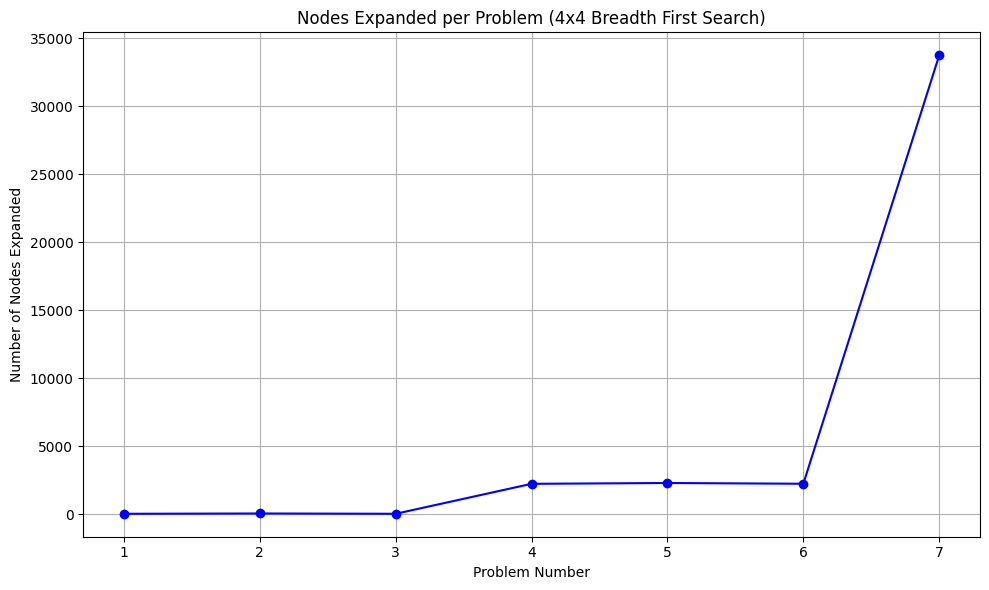

In [ ]:
problem_numbers = list(range(1, len(nodes_expanded) + 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(problem_numbers, nodes_expanded, marker='o', linestyle='-', color='blue')
plt.title('Nodes Expanded per Problem (4x4 Breadth First Search)')
plt.xlabel('Problem Number')
plt.ylabel('Number of Nodes Expanded')
plt.xticks(problem_numbers)  # Show each problem number on the x-axis
plt.grid(True)
plt.tight_layout()
plt.show()

4X4: A*

In [ ]:
AStarFb = lambda n: n.PathCost + OutOfPlace(n.State, GoalState) + ManhattanDistance(n.State, GoalState)

Solutions = []
counter = 1
nodes_expanded = []
for s in problems:
  TileSliding.INITIAL = s
  ret, cost = BestFirstSearch(TileSliding, AStarFb)
  if ret is not None:
    sol = Solution(ret)
    print ("-----------------------")
    print ("Problem: ", counter)
    print ("Init state: ", TileSliding.INITIAL)
    print ("Sol: ", sol)
    print (TileSliding.INITIAL,'\n')
    print (ApplyMoves(sol, TileSliding.INITIAL))
    print ("Len Sol: ", len(sol))
    print ("# Nodes Expanded=", cost)
    nodes_expanded.append(cost)
    print ("-----------------------")
    Solutions.append((''.join(map(str, s)), ''.join(sol), cost))
  else:
    print("No solution found within the expansion limit.")
  counter += 1
print ("-------")
print (Solutions)

-----------------------
Problem:  1
Init state:  [1, 2, 3, 4, 5, 7, 0, 8, 9, 6, 10, 12, 13, 14, 11, 15]
Sol:  ['l', 'd', 'r', 'd', 'r']
[1, 2, 3, 4, 5, 7, 0, 8, 9, 6, 10, 12, 13, 14, 11, 15] 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0]
Len Sol:  5
# Nodes Expanded= 5
-----------------------
-----------------------
Problem:  2
Init state:  [1, 2, 3, 4, 5, 10, 6, 8, 9, 0, 7, 12, 13, 14, 11, 15]
Sol:  ['u', 'r', 'd', 'd', 'r']
[1, 2, 3, 4, 5, 10, 6, 8, 9, 0, 7, 12, 13, 14, 11, 15] 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0]
Len Sol:  5
# Nodes Expanded= 5
-----------------------
-----------------------
Problem:  3
Init state:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 0, 13, 14, 12, 11]
Sol:  ['d', 'l', 'u', 'r', 'd']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 0, 13, 14, 12, 11] 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0]
Len Sol:  5
# Nodes Expanded= 5
-----------------------
-----------------------
Problem:  4
Init state:  [1, 6, 2, 4, 9, 0, 3, 8, 10, 5, 7, 11, 

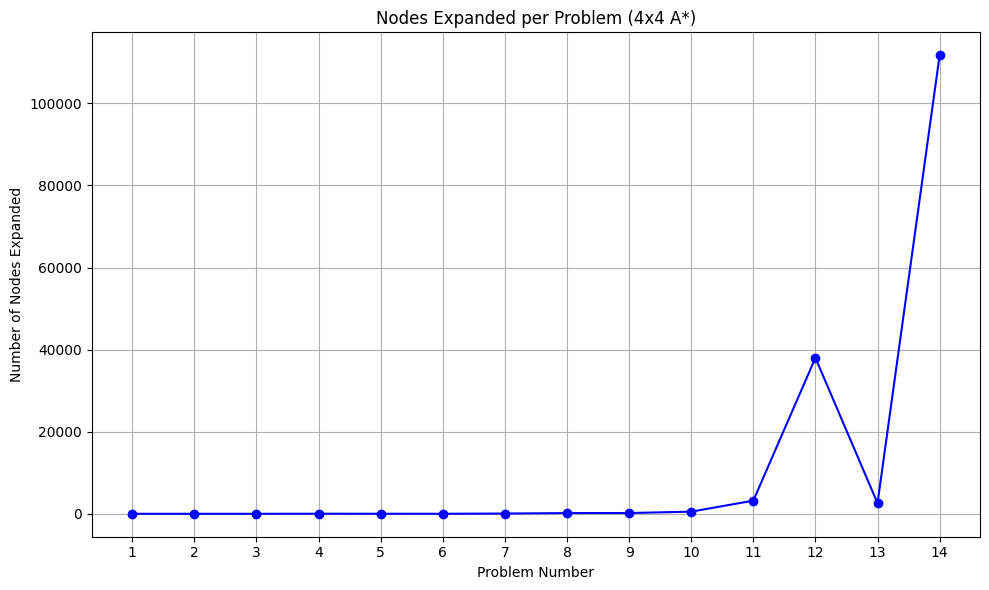

In [ ]:
problem_numbers = list(range(1, len(nodes_expanded) + 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(problem_numbers, nodes_expanded, marker='o', linestyle='-', color='blue')
plt.title('Nodes Expanded per Problem (4x4 A*)')
plt.xlabel('Problem Number')
plt.ylabel('Number of Nodes Expanded')
plt.xticks(problem_numbers)  # Show each problem number on the x-axis
plt.grid(True)
plt.tight_layout()
plt.show()

**Results and Conclusions**


For both the 3x3 and 4x4 sliding problem grids 15 random walk problems were created with the goal state as the initial state before the random walks occured. Every 3 problems had increased the number of random walks with a max of 80 steps. When comparing the breadth first search and A\* algorithms on the 3x3 grid problem, there is a notable difference in the number of nodes expanded. For the breadth first search the highest number of nodes expanded is around 100,000 while for A\* it is 20,000. This shows the greater efficiency of A* compared to breadth first search. This problem is noticed even further when conducting comparisons from the 4x4 problem. In just increasing the dimension size the number of possible solutions and the effective search space increases drastically. Because of this the breadth first search has a hard time solving problems greater than a random walk of 10. Because of this the algorithm fails on problem numbers greater than 6. A\* on the other hand could solve all problems 1-15 most of the time and would sometimes fail on the greater search spaces. As a comparison, the max number of nodes expanded in the 4x4 A\* algorithm reaches 100,000 compared to 20,000 from the 3x3 problem. Conclusions made from this assignment show how increasing the randomness of the search space and expanding the dimensionality have drastics effects on the efficiency of searching algorithms.